# Electrodynamics I (Fall 2021) Computational Assignment
# E-Field From Randomly-Distributed Charges

## Imports

In [93]:
#Non-custom imports.
#
#Imports for unused modules are commented out to minimize errors and setup.

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
#from matplotlib.animation import FuncAnimation
import time
#import matplotlib.animation as animation
#import seaborn as sns
#import pandas as pd
#from graphics import *
#import sys
import random
import re
from tqdm import tqdm
import pandas as pd

## Function Definitions

### placePoints

This function is intended to return a list of a given number of randomly-placed points selected from a given N-dimensional distribution.

In [31]:
def placePoints(n, D):
    
    """
    Takes in a N-dimensional distribution of possible points and returns a list of specified length of N-dimensional random selections of points.
    
    INPUTS
    n:   The number of points. (Unitless)
    D:   A 2D list or array for the distribution of possible points. (Arbitrary)
    
    OUTPUTS
    points: A list of length n and the same dimensionality as D. Each element of the list represents a point with the sublist's first element being
            the position of that point of the first component from D, the sublist's second element being the position of that point of the second
            component from D, and so on. (Arbitrary)
    
    """
    
    points = [] #Empty list to be used for the positions of each point
    
    for i in range(n): #Loop for the number of points desired
        points.append([]) #Add an empty list to the list of points for each desired random point
        a = random.randrange(len(D[0])) #Generate a random index
        for j in range(len(D)): #Loop for each dimension of the given distribution
            points[i].append( D[j][a] ) #Add the element at the given random index from the axis of the current iteration to the current point
            
    
    return points #Returns the list of points

### calcE

This functoon takes in a given point in N-dimensional space and a given charge and calculates the electric field at the given point due to the given charge distributed about a given number of randomly-selected points from a given distribution with the same dimensionality as the given point.

In [32]:
def calcE(P, Q, n, D, k=8.988E9):
    
    """
    Calculates the E-Field at P due to total charge Q distributed about n points randomly selected from D.
    
    INPUTS
    P: A list of an arbitrary number of elements with each element being a position along an axis. (ND vector, meters 'm')
    Q: The total charge to be distributed about the n random points from D. (Coulombs 'C')
    n: The number of random points to be selected from D. (Dimensionless)
    D: An list or Numpy array of the same length as P containing sublists or subarrays with associated positions along an axis, with each element
       of D representing an axis in ND space and each element of those axes representing a position along the given axis. A possible point would
       be, for example, a vector of the values at the i-th index of each axis. (1D list or array of ND vectors, meters 'm')
    k: Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    E: A Numpy array containing each component of the calculated electric field. (ND vector, Newtons per Coulomb 'N/C')
    """
    
    if (len(P) != len(D)):
        print("Error: P and D have different dimensionality.")
    
    q = Q/n #Calculate the value of the charge on each point charge
    
    points = placePoints(n, D) #Generate a set of random points
    
    P = np.array(P) #Convert the position vector to a Numpy array
    
    E = np.zeros(len(P)) #Define a Numpy array representing a vector of the same dimensionality as P and fill it with zeros

    for i in range(n): #Loop for the number of random points
        r = P - np.array(points[i]) #Calculate the separation vector between the random point of the current iteration and the given point
        
        rmag = np.linalg.norm(r) #Calculate the magnitude of the separation
        
        if (rmag == 0):
            print("rmag = 0, returning None to avoid division by 0")
            return None
        
        e = k*q/(rmag**2) #Calculate the electric field at the given point due to the random point of the current iteration
        
        E += (e/rmag)*r #Add the calculated electric field vector to the total electric field ((1/rmag)*r = r̂)
    
    return E #Return the total electric field vector

### tester

This function is intended to run calcE repeatedly and return the list of calculations as well as averages of the calculations.

In [71]:
def tester(N, P, Q, n, D, k=8.988E9):
    
    """
    This function computes lists of electric field data and averages generated by electric field calculations repeated N times for the same inputs.
    
    INPUTS
    N: The number of calculations to be done. (Dimensionless)
    P: A list of an arbitrary number of elements with each element being a position along an axis. (ND vector, meters 'm')
    Q: The total charge to be distributed about the n random points from D. (Coulombs 'C')
    n: The number of random points to be selected from D. (Dimensionless)
    D: An list or Numpy array of the same length as P containing sublists or subarrays with associated positions along an axis, with each element
       of D representing an axis in ND space and each element of those axes representing a position along the given axis. A possible point would
       be, for example, a vector of the values at the i-th index of each axis. (1D list or array of ND vectors, meters 'm')
    k: Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    aveE:  The average electric field vector. (ND vector, Newtons per Coulomb 'N/C')
    aver̂:  The average electric field unit vector. (ND vector, meters 'm')
    Emags: A list of calculated electric field magnitudes. (1D list, Newtons per Coulomb 'N/C')
    x̂θs:   A list of calculated electric field vector angles with the X-axis. (1D list, radians 'rad')
    r̂θs:   A list of calculated electric field vector angles with the average electric field vector. (1D list, radians 'rad')
    """
    
    aveE = np.zeros(len(P)) #
    aver̂ = np.zeros(len(P)) #
    Emags = []              #Starting variable definitions
    x̂θs = []                #
    r̂θs = []                #
    
    x̂ = np.zeros(len(P)) #Initially define x̂ as a zero vector of the same dimensionality as P
    x̂[0] = 1 #Set the first value of the previously-calculated zero vector to 1, causing this vector to represent the 0th standard
             #basis vector 'e_1' (or 'x̂' for typical uses)
    
    for i in range(N): #Loop for the number of calculations desired
        E = calcE(P, Q, n, D, k) #Compute the electric field
        
        r̂ = (1/np.linalg.norm(E))*E #Calculate the unit vector in the direction of the electric field
        
        aveE += E #Add the calculated electric field vector to the summation to be recalculated later
        aver̂ += r̂ #Add the calculated electric field unit vector to the summation to be recalculated later
        Emags.append(np.linalg.norm(E)) #Add the calculated electric field magnitude to the list
        x̂θs.append(np.arccos(np.dot(r̂, x̂))) #Add the calculated electric field unit vector's angle to the X-axis to the list
        r̂θs.append(r̂) #Add the calculated electric field unit vector to the list to be recalculated later
    
    aveE = (1/N)*aveE #Take the average of the electric field vector
    if (np.linalg.norm(aver̂) == 0):
        print("Magnitude of aver̂ = 0, setting to zero vector instead")
        aver̂ = 0*aver̂
    else:
        aver̂ = (1/np.linalg.norm(aver̂))*aver̂ #Take the average of the electric field unit vectors
    Emags = np.array(Emags) #Convert the list of electric field magnitudes to a Numpy array
    x̂θs = np.array(x̂θs) #Convert the list of the calculated electric field unit vectors' angles to the X-axis to a Numpy array
    
    for i in range(len(r̂θs)): #Loop for each value of r̂θs
        r̂θs[i] = np.arccos(round(np.dot(r̂θs[i], aver̂), 15)) #Set each element to the angle that the corresponding r̂ makes with the mean r̂
    
    r̂θs = np.array(r̂θs) #Convert the list of calculated r̂ angles to the mean r̂ to a Numpy array
    
    return aveE, aver̂, Emags, x̂θs, r̂θs #Return data

### testandsummarize

This function is intended to calculate and then print summaries of electric field data.

In [63]:
def testandsummarize(N, P, Q, n, D, k=8.988E9):
    
    """
    Calculates data with the function 'tester' and prints summaries of it.
    
    INPUTS
    N: The number of calculations to be done. (Dimensionless)
    P: A list of an arbitrary number of elements with each element being a position along an axis. (ND vector, meters 'm')
    Q: The total charge to be distributed about the n random points from D. (Coulombs 'C')
    n: The number of random points to be selected from D. (Dimensionless)
    D: An list or Numpy array of the same length as P containing sublists or subarrays with associated positions along an axis, with each element
       of D representing an axis in ND space and each element of those axes representing a position along the given axis. A possible point would
       be, for example, a vector of the values at the i-th index of each axis. (1D list or array of ND vectors, meters 'm')
    k: Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    None, prints summarized data.
    """
    
    aveE, aver̂, Emags, x̂θs, r̂θs = tester(N, P, Q, n, D, k) #Calculate electric field data
    
    x̂ = np.zeros(len(P)) #Initially define x̂ as a zero vector of the same dimensionality as P
    x̂[0] = 1 #Set the first value of the previously-calculated zero vector to 1, causing this vector to represent the 0th standard
             #basis vector 'e_1' (or 'x̂' for typical uses)

    print("E:\t\t\t\t\t" + str(aveE) + " N/C") #Print the electric field magnitude
    print("E standard deviation:\t\t\t" + str(np.std(np.array(Emags))) + " N/C") #Print the standard deviation of the electric field magnitude calculations
    print("E percent standard deviation:\t\t" + str(100*np.std(np.array(Emags))/np.linalg.norm(aveE)) + " %") #Print the ratio of the electric field standard deviation to electric field magnitude as a percentage
    print() #New line
    print("r̂:\t\t\t\t\t" + str(aver̂)) #Print the calculated electric field unit vector
    print() #New line
    print("Mean angle from x̂:\t\t\t" + str(np.mean(x̂θs)) + " rad") #Print the mean angle of each calculated electric field unit vector to
                                                                            #the X-axis
    print("Angle from x̂ standard deviation:\t" + str(np.std(x̂θs)) + " rad") #Print the standard deviation of the electric field unit vector angle
                                                                                     #measurements to the X-axis
    print("Mean angle from r̂:\t\t\t" + str(np.mean(r̂θs)) + " rad") #Print the average angle of the calculated unit vectors to the average unit vector
    print("Angle from r̂ standard deviation:\t" + str(np.std(r̂θs)) + " rad") #Print the standard deviation of the calculated electric field unit
                                                                                     #vector angle measurements to the expected electric field unit vector

### varier

This function is intended to calculate electric field data for varied inputs of a given parameter.

In [25]:
def varier(N, Varied_Variable, testrange, P, Q, n, D, k=8.988E9):
    
    """
    Calculates the electric field data repeatedly with a single input varied over each calculation and lists the data to see how it behaves with
    the specified input changing.
    
    INPUTS
    N:               The number of different inputs to be tested. (Unitless)
    Varied_Variable: The input that will be adjusted between calculations. (String)
    testrange:       A 1D, two-element list with the first element being the first input in place of the varied input and the second element being
                         the last (exclusive). (2 element list, units depend on which input it is being applied to)
    P:               A list of an arbitrary number of elements with each element being a position along an axis. (ND vector, meters 'm')
    Q:               The total charge to be distributed about the n random points from D. (Coulombs 'C')
    n:               The number of random points to be selected from D. (Dimensionless)
    D:               An list or Numpy array of the same length as P containing sublists or subarrays with associated positions along an axis,
                         with each element of D representing an axis in ND space and each element of those axes representing a position along the
                         given axis. A possible point would be, for example, a vector of the values at the i-th index of each axis.
                         (1D list or array of ND vectors, meters 'm')
    k:               Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    Es:        A Numpy array of each calculated electric field vector. (1D array of ND vectors, Newtons per Coulomb 'N/C')
    r̂s:        A Numpy array of each calculated electric field unit vector. (1D Numpy array of ND vectors, unitless)
    testrange: A Numpy array of each input value tested in place of the varied input. (1D Numpy array, units depend on which input it is applied to)
    """
    
    testrange = np.arange(testrange[0], testrange[1], (testrange[1]-testrange[0])/N) #Set testrange to a list of values that will be used in place of the
                                                                                     #varied input
    
    Es = [] #
    r̂s = [] #Define starting variables (lists to add data to)
    
    if (Varied_Variable == "Q"): #If the input to be varied is Q
        for i in range(len(testrange)): #Loop for each value in testrange
            E = calcE(P, testrange[i], n, D, k) #Calculate electric field for the given inputs of this iteration
            Es.append(E) #Add the calculated electric field vector to the list
            r̂s.append((1/np.linalg.norm(E))*E) #Add the calculated electric field unit vector to the list
    elif (Varied_Variable == "r"): #If the input to be varied is the distance of the point to the origin
        variedR = np.zeros(len(P)) #Define a zero vector of the same dimensionality as P
        for i in range(len(testrange)): #Loop for each value in testrange
            variedR[0] = testrange[i] #Set the value along the first axis of the previously calculated zero vector to the given input of this iteration
            E = calcE(variedR, Q, n, D, k) #Calculate the electric field for the given inputs of this iteration
            Es.append(E) #Add the calculated electric field vector to the list
            r̂s.append((1/np.linalg.norm(E))*E) #Add the calculated electric field unit vector to the list
    elif (Varied_Variable == "n"): #If the input to be varied is n
        testrange = np.unique(testrange.astype(int)) #Cast all of the elements of testrange to integers and remove non-unique values
        testrange = testrange[testrange != 0] #Delete all occurrences of the value 0 from the testrange to avoid divisions by zero
        for i in range(len(testrange)): #Loop for each value in testrange
            E = calcE(P, Q, testrange[i], D, k) #Calculate the electric field for the given inputs of this iteration
            Es.append(E) #Add the calculated electric field vector to the list
            r̂s.append((1/np.linalg.norm(E))*E) #Add the calculated electric field unit vector to the list
    
    Es = np.array(Es, dtype=object) #Convert the electric field list to a Numpy array
    r̂s = np.array(r̂s, dtype=object) #Convert the electric field unit vector list to a Numpy array
    
    return Es, r̂s, testrange #Return data

### varierAver

This function is intended to do the same thing as 'varier' but with repeated and averaged calculations for each input.

In [77]:
def varierAver(num, N, Varied_Variable, testrange, P, Q, n, D, k=8.988E9):
    
    """
    Calculates averaged electric field data repeatedly with a single varied input over each calculation and lists the data to see how it behaves with the
    specified inputs changing.
    
    INPUTS
    num:             The number of points to average for each input. (Unitless)
    N:               The number of different inputs to be tested. (Unitless)
    Varied_Variable: The input that will be adjusted between calculations. (String)
    testrange:       A 1D, two-element list with the first element being the first input in place of the varied input and the second element being
                         the last (exclusive). (2 element list, units depend on which input it is being applied to)
    P:               A list of an arbitrary number of elements with each element being a position along an axis. (ND vector, meters 'm')
    Q:               The total charge to be distributed about the n random points from D. (Coulombs 'C')
    n:               The number of random points to be selected from D. (Dimensionless)
    D:               An list or Numpy array of the same length as P containing sublists or subarrays with associated positions along an axis,
                         with each element of D representing an axis in ND space and each element of those axes representing a position along
                         the given axis. A possible point would be, for example, a vector of the values at the i-th index of each axis.
                         (1D list or array of ND vectors, meters 'm')
    k:               Coulomb's constant. (Kilogram meter-cubed per second-squared Coulomb-squared 'kg * m^3 * s^-2 * C^-2')
    
    OUTPUTS
    Es:        A Numpy array of each calculated electric field vector average. (1D array of ND vectors, Newtons per Coulomb 'N/C')
    r̂s:        A Numpy array of each calculated electric field unit vector average. (1D array of ND vectors, unitless)
    Eσs:       A Numpy array of the standard deviation for each electric field magnitude calculation. (1D array, Newtons per Coulomb 'N/C')
    x̂θσs:      A Numpy array of the standard deviation for each electric field unit vector angle to the X-axis. (1D array, radians 'rad')
    r̂θσs:      A Numpy array of the standard deviation for each electric field unit vector angle to the average electric field unit
                   vector. (1D array, radians 'rad')
    testrange: A Numpy array of each input value tested in place of the varied input. (1D array, units depend on which input it is applied to)
    """
    
    testrange = np.arange(testrange[0], testrange[1], (testrange[1]-testrange[0])/N) #Set testrange to a list of values that will be used in place of the
                                                                                     #varied input
    
    Es = []   #
    r̂s = []   #
    Eσs = []  #Define starting variables (lists to add data to)
    x̂θσs = [] #
    r̂θσs = [] #
    
    x̂ = np.zeros(len(P))
    x̂[0] = 1
    
    if (Varied_Variable == "Q"): #If the input to be varied is Q
        for i in tqdm(range(len(testrange))): #Loop for each value in testrange
            aveE, aver̂, Emags, x̂θs, r̂θs = tester(num, P, testrange[i], n, D, k) #Calculate the electric field data for the given inputs of this
                                                                                #iteration
            Es.append(aveE)           #
            r̂s.append(aver̂)           #
            Eσs.append(np.std(Emags)) #Add the calculated data to the lists
            x̂θσs.append(np.std(x̂θs))  #
            r̂θσs.append(np.std(r̂θs))  #
    elif (Varied_Variable == "r"): #If the input to be varied is the distance of the point to the origin
        variedR = np.zeros(len(P)) #Define an ND zero vector
        for i in tqdm(range(len(testrange))): #Loop for each value in testrange
            variedR[0] = testrange[i] #Set the value along the first axis of the previously defined ND zero vector to the given input of this iteration
            aveE, aver̂, Emags, x̂θs, r̂θs = tester(num, variedR, Q, n, D, k) #Calculate the electric field for the given inputs of this iteration
            Es.append(aveE)           #
            r̂s.append(aver̂)           #
            Eσs.append(np.std(Emags)) #Add the calculated data to the lists
            x̂θσs.append(np.std(x̂θs))  #
            r̂θσs.append(np.std(r̂θs))  #
    elif (Varied_Variable == "n"): #If the input to be varied is n
        testrange = np.unique(testrange.astype(int)) #Cast all of the elements of testrange to integers and remove non-unique values
        testrange = testrange[testrange != 0] #Delete all occurrences of the value 0 from the testrange to avoid divisions by zero
        for i in tqdm(range(len(testrange))): #Loop for each value in testrange
            aveE, aver̂, Emags, x̂θs, r̂θs = tester(num, P, Q, testrange[i], D, k) #Calculate the electric field for the given inputs of this iteration
            Es.append(aveE)           #
            r̂s.append(aver̂)           #
            Eσs.append(np.std(Emags)) #Add the calculated data to the lists
            x̂θσs.append(np.std(x̂θs))  #
            r̂θσs.append(np.std(r̂θs))  #
    
    Es = np.array(Es, dtype=object) #Convert the electric field vector list to a Numpy array
    r̂s = np.array(r̂s, dtype=object) #Convert the electric field unit vector list to a Numpy array
    Eσs = np.array(Eσs) #Convert the electric field magnitude standard deviation list to a Numpy array
    x̂θσs = np.array(x̂θσs) #Convert the list of standard deviations for the electric field unit vector angles to the X-axis to a Numpy array
    r̂θσs = np.array(r̂θσs) #Convert the list of standard deviations for the electric field unit vector angles to the average electric field unit vector
                          #to a Numpy array
    
    return Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange #Return data

In [123]:
def genCircle(P, R, Δ):
    
    P = np.array(P)
    
    θ = np.arange(0, 2*np.pi+Δ, Δ)
    
    D = np.array([R*np.cos(θ), R*np.sin(θ)])
    
    return D

[[ 2.00000000e+00  1.99605346e+00  1.98422940e+00  1.96457450e+00
   1.93716632e+00  1.90211303e+00  1.85955297e+00  1.80965410e+00
   1.75261336e+00  1.68865585e+00  1.61803399e+00  1.54102649e+00
   1.45793725e+00  1.36909421e+00  1.27484798e+00  1.17557050e+00
   1.07165359e+00  9.63507348e-01  8.51558583e-01  7.36249105e-01
   6.18033989e-01  4.97379774e-01  3.74762629e-01  2.50666467e-01
   1.25581039e-01 -3.21624530e-16 -1.25581039e-01 -2.50666467e-01
  -3.74762629e-01 -4.97379774e-01 -6.18033989e-01 -7.36249105e-01
  -8.51558583e-01 -9.63507348e-01 -1.07165359e+00 -1.17557050e+00
  -1.27484798e+00 -1.36909421e+00 -1.45793725e+00 -1.54102649e+00
  -1.61803399e+00 -1.68865585e+00 -1.75261336e+00 -1.80965410e+00
  -1.85955297e+00 -1.90211303e+00 -1.93716632e+00 -1.96457450e+00
  -1.98422940e+00 -1.99605346e+00 -2.00000000e+00 -1.99605346e+00
  -1.98422940e+00 -1.96457450e+00 -1.93716632e+00 -1.90211303e+00
  -1.85955297e+00 -1.80965410e+00 -1.75261336e+00 -1.68865585e+00
  -1.61803

(-2.2, 2.2, -2.2, 2.2)

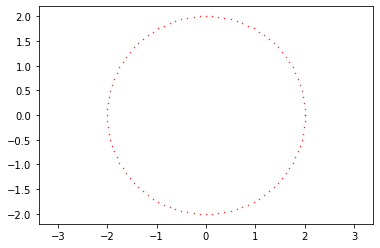

In [133]:
D = genCircle([1, 1], 2, 2*np.pi/100)

print(D)

fig, axe = plt.subplots()
axe.scatter(D[0], D[1], 0.2, "RED")
axe.axis('equal')

## Tests

In [42]:
#placePoints test

print(placePoints(2, [[1, 2, 3]]))
print(placePoints(3, [[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]))

[[3], [1]]
[[1, 1, 1], [2, 2, 2], [2, 2, 2]]


In [44]:
#calcE test

print(calcE([0], 1, 1, [[1, 2, 3]]))
print(calcE([0], 1, 2, [[1, 2, 3]]))
print(calcE([0], 1, 10, [[1, 2, 3]]))
print(calcE([0], 1, 200, [[1, 2, 3]]))
print(calcE([0], 1, 20000, [[1, 2, 3]]))
print()
print(calcE([0, 0], 1, 1, [[1, 2, 3], [1, 2, 3]]))
print(calcE([0, 0], 1, 10, [[1, 2, 3], [1, 2, 3]]))
print(calcE([0, 0], 1, 200, [[1, 2, 3], [1, 2, 3]]))
print(calcE([0, 0], 1, 20000, [[1, 2, 3], [1, 2, 3]]))
print()
a = np.arange(1, 3, 0.001)
print(calcE([0, 0], 1, 1, [a, a]))
print(calcE([0, 0], 1, 10, [a, a]))
print(calcE([0, 0], 1, 200, [a, a]))
print(calcE([0, 0], 1, 20000, [a, a]))

[-9.98666667e+08]
[-5.6175e+09]
[-3.2207e+09]
[-4.1944e+09]
[-4.07870447e+09]

[-3.17773787e+09 -3.17773787e+09]
[-9.44494313e+08 -9.44494313e+08]
[-1.34171155e+09 -1.34171155e+09]
[-1.43876054e+09 -1.43876054e+09]

[-1.57372888e+09 -1.57372888e+09]
[-9.66128917e+08 -9.66128917e+08]
[-1.02107186e+09 -1.02107186e+09]
[-1.05447556e+09 -1.05447556e+09]


In [59]:
#tester test

a = tester(100, [0, 0], 1, 2000, [[1, 2, 3], [1, 2, 3]])
print(a[0])

[-1.44453564e+09 -1.44453564e+09]


In [60]:
#tester test 2

a = np.arange(0.1, 10, 0.0001)
print(tester(1000, [0, 0, 0], 1, 200, [a, a, a])[0])

[-1.72068371e+09 -1.72068371e+09 -1.72068371e+09]


In [64]:
#testandsummarize test

a = np.arange(0.1, 10, 0.0001)
testandsummarize(1000, [0, 0], 100, 200, [a, a])
print()
print()
testandsummarize(1000, [0, 0, 0], 100, 200, [a, a, a])
print()
print()
print()
print()
testandsummarize(1000, [0, 0], 100, 20000, [a, a])
print()
print()
testandsummarize(1000, [0, 0, 0], 100, 20000, [a, a, a])

E:					[-3.18865019e+11 -3.18865019e+11] N/C
E standard deviation:			181753727996.53006 N/C
E percent standard deviation:		40.30523451645791 %

r̂:					[-0.70710678 -0.70710678]

Mean angle from x̂:			2.3561944901923444 rad
Angle from x̂ standard deviation:	4.487279198552985e-16 rad
Mean angle from r̂:			0.0 rad
Angle from r̂ standard deviation:	0.0 rad


E:					[-1.71221101e+11 -1.71221101e+11 -1.71221101e+11] N/C
E standard deviation:			119331920079.53773 N/C
E percent standard deviation:		40.23821580141705 %

r̂:					[-0.57735027 -0.57735027 -0.57735027]

Mean angle from x̂:			2.186276035465284 rad
Angle from x̂ standard deviation:	2.558817209832386e-16 rad
Mean angle from r̂:			0.0 rad
Angle from r̂ standard deviation:	0.0 rad




E:					[-3.18340541e+11 -3.18340541e+11] N/C
E standard deviation:			18075965644.006687 N/C
E percent standard deviation:		4.015083299488252 %

r̂:					[-0.70710678 -0.70710678]

Mean angle from x̂:			2.3561944901923444 rad
Angle from x̂ standard deviatio

In [65]:
#testandsummarize test

a = np.arange(0.1, 10, 0.0001)
b = np.sin(a)
testandsummarize(1000, [0, 0], 100, 200, [a, b])
print()
print()
testandsummarize(1000, [0, 0, 0], 100, 200, [a, b, a])
print()
print()
print()
print()
testandsummarize(1000, [0, 0], 100, 20000, [a, b])
print()
print()
testandsummarize(1000, [0, 0, 0], 100, 20000, [a, b, a])

E:					[-3.58580239e+11 -3.13575318e+11] N/C
E standard deviation:			176266678975.03183 N/C
E percent standard deviation:		37.003610792833456 %

r̂:					[-0.75956983 -0.65042576]

Mean angle from x̂:			2.4334575840927894 rad
Angle from x̂ standard deviation:	0.032767847601123626 rad
Mean angle from r̂:			0.02419347501899964 rad
Angle from r̂ standard deviation:	0.022099947923778156 rad


E:					[-1.85159471e+11 -1.67246113e+11 -1.85159471e+11] N/C
E standard deviation:			122988910504.65501 N/C
E percent standard deviation:		39.58346726046503 %

r̂:					[-0.59917353 -0.53101993 -0.59917353]

Mean angle from x̂:			2.2130723855311114 rad
Angle from x̂ standard deviation:	0.011642491279229181 rad
Mean angle from r̂:			0.01900083840177338 rad
Angle from r̂ standard deviation:	0.017024726075880004 rad




E:					[-3.55404110e+11 -3.10345217e+11] N/C
E standard deviation:			18464748066.6445 N/C
E percent standard deviation:		3.9134087841906835 %

r̂:					[-0.75330887 -0.65766689]

Mean angle 

100%|██████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<?, ?it/s]


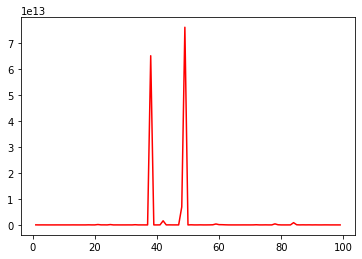

In [69]:
#varier test

a = np.arange(-10, 10, 0.0001)
E, r̂, testrange = varier(100, "n", [1, 100], [0, 0, 0], 1, 200, [a, a, a])
y = []

for i in tqdm(range(len(E))):
    y.append(np.linalg.norm(E[i]))

fig, axe = plt.subplots()
axe.plot(testrange, y, "RED")

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 100126.62it/s]


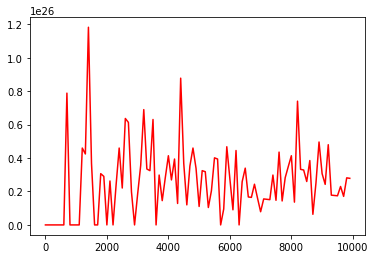

In [72]:
#varier test

a = np.arange(-10, 10, 0.0001)
b = np.sin(a)
Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [1, 10000], [0, 0, 0], 1, 200, [a, b, a])
y = []

for i in tqdm(range(len(Es))):
    y.append(np.linalg.norm(Es[i]))

fig, axe = plt.subplots()
axe.plot(testrange, y, "RED")

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 96933.30it/s]


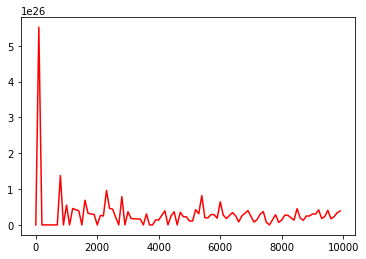

In [73]:
#varier test

a = np.arange(-10, 10, 0.0001)
Es, r̂s, Eσs, x̂θσs, r̂θσs, testrange = varierAver(100, 100, "n", [1, 10000], [0, 0, 0], 1, 200, [a, a, a])
y = []

for i in tqdm(range(len(Es))):
    y.append(np.linalg.norm(Es[i]))

fig, axe = plt.subplots()
axe.plot(testrange, y, "RED")

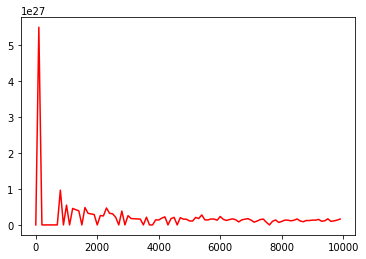

In [74]:
fig, axe = plt.subplots()
axe.plot(testrange, Eσs, "RED")

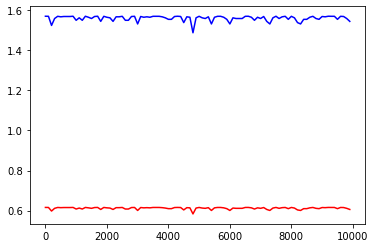

In [75]:
fig, axe = plt.subplots()
axe.plot(testrange, x̂θσs, "RED")
axe.plot(testrange, r̂θσs, "BLUE")